# Work on `car_price_dataset`
Steps:
1. EDA
2. Missing Value

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


## Column analysis
1. `Brand` Nominal ✅
2. `Model` Nominal ✅
3. `Year` Numarical ❌
4. `Engine_Size` Numarical ❌
5. `Fuel_Type` Nominal ✅
6. `Transmission`Nominal ✅
7. `Mileage` Numarical ❌
8. `Doors` Numarical ❌
9. `Owner_Count` Numarical ❌
10. `Price` Numarical ❌

In [3]:
df.shape

(10000, 10)

In [7]:
df.Brand.unique(), df.Brand.nunique()

(array(['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota',
        'Honda', 'BMW', 'Hyundai', 'Ford'], dtype=object),
 10)

In [9]:
df.Model.unique(), df.Model.nunique()

(array(['Rio', 'Malibu', 'GLA', 'Q5', 'Golf', 'Camry', 'Civic', 'Sportage',
        'RAV4', '5 Series', 'CR-V', 'Elantra', 'Tiguan', 'Equinox',
        'Explorer', 'A3', '3 Series', 'Tucson', 'Passat', 'Impala',
        'Corolla', 'Optima', 'Fiesta', 'A4', 'Focus', 'E-Class', 'Sonata',
        'C-Class', 'X5', 'Accord'], dtype=object),
 30)

In [10]:
df.Fuel_Type.unique(), df.Fuel_Type.nunique()

(array(['Diesel', 'Hybrid', 'Electric', 'Petrol'], dtype=object), 4)

In [11]:
df.Transmission.unique(), df.Transmission.nunique()

(array(['Manual', 'Automatic', 'Semi-Automatic'], dtype=object), 3)

### Nominal Column List

In [12]:
nominal_col_list = ['Brand', 'Model', 'Fuel_Type', 'Transmission']

# EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


<Axes: xlabel='Brand', ylabel='count'>

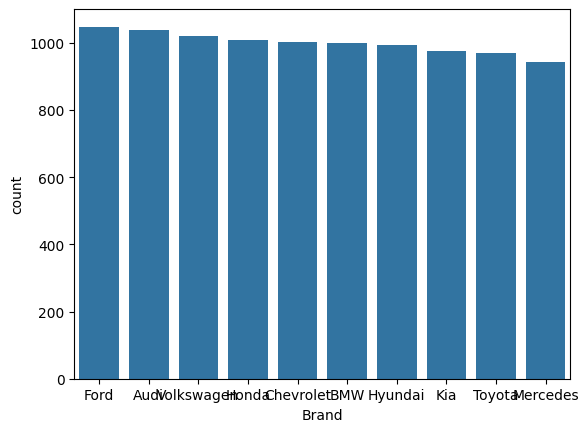

In [14]:
sns.barplot(x=df.Brand.value_counts().index, y=df.Brand.value_counts())

<Axes: xlabel='Year', ylabel='Price'>

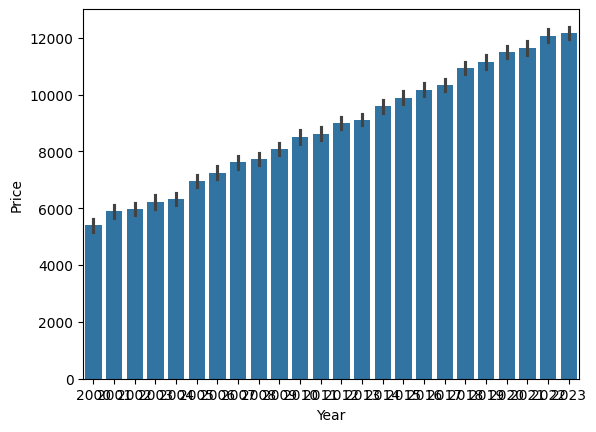

In [19]:
sns.barplot(x=df['Year'], y=df['Price'])
#

In [33]:
df['Model'].value_counts().head().index

Index(['Accord', 'Fiesta', 'Impala', '5 Series', 'Tiguan'], dtype='object', name='Model')

# Column Transformation

## Train Test Split

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [36]:
X = df.drop('Price', axis=1)
y = df['Price']

In [39]:
X.sample().shape

(1, 9)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape

(8000, 9)

In [42]:
y_test.shape

(2000,)

In [43]:
y_test

,Price
6252,2000
4684,11164
1731,14630
4742,7334
4521,10127
...,...
6412,4681
8285,12839
7853,8124
1095,6709


# Column transformer

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [45]:
transformer = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, drop='first'), nominal_col_list),
    ],
    remainder='passthrough'
)

In [47]:
transformer.fit_transform(X_train).shape

(8000, 48)

In [51]:
y_train

,Price
9254,9721
1561,9402
1670,8531
6087,7503
6669,10694
...,...
5734,2969
5191,10635
5390,9317
860,7997


In [57]:
transformer.transform(X_test)

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.57760e+05,
        5.00000e+00, 5.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.11790e+05,
        5.00000e+00, 3.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.34730e+04,
        5.00000e+00, 4.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.38757e+05,
        2.00000e+00, 1.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.89547e+05,
        2.00000e+00, 5.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 7.72130e+04,
        4.00000e+00, 5.00000e+00]])

In [56]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Brand', 'Model', 'Fuel_Type',
                                  'Transmission'])])